In [1]:
# import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import the three datasets

In [2]:
# import users file
#UserID::Gender::Age::Occupation::Zip-code
df_user=pd.read_csv('users.dat',sep='::',names=['UserID','Gender','Age','Occupation','Zip Code'],engine='python')

In [3]:
df_user

,UserID,Gender,Age,Occupation,Zip Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [4]:
# import movies data
#MovieID::Title::Genres
df_movies=pd.read_csv('movies.dat',sep='::',names=['MovieID','Title','Genres'],engine='python',encoding='latin-1')

In [5]:
df_movies

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [6]:
# import ratings

df_ratings=pd.read_csv('ratings.dat',sep='::',names=['UserID','MovieID','Rating','Timestamp'],engine='python',encoding='latin-1')

In [7]:
df_ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [8]:
df_movies.shape

(3883, 3)

In [9]:
df_ratings.shape

(1000209, 4)

In [10]:
df_user.shape

(6040, 5)

## 2. Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [11]:
df_movies.columns

Index(['MovieID', 'Title', 'Genres'], dtype='object')

In [12]:
df_ratings.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype='object')

In [13]:
# dfmovieratings
dfMovieRatings=df_movies.merge(df_ratings,on='MovieID',how='inner')

In [14]:
dfMovieRatings

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474
...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,5812,4,992072099
1000205,3952,"Contender, The (2000)",Drama|Thriller,5831,3,986223125
1000206,3952,"Contender, The (2000)",Drama|Thriller,5837,4,1011902656
1000207,3952,"Contender, The (2000)",Drama|Thriller,5927,1,979852537


In [15]:
# Master_Data
dfMaster=dfMovieRatings.merge(df_user,on='UserID',how='inner')

In [16]:
dfMaster

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


In [17]:
dfMaster.isnull().sum().any()

False

In [18]:
dfMaster.to_csv('Master data1.csv')

# 3. Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
1. User Age Distribution
2. User rating of the movie “Toy Story”
3. Top 25 movies by viewership rating
4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

## 3) 1) User age distribution

In [19]:
dfMaster['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

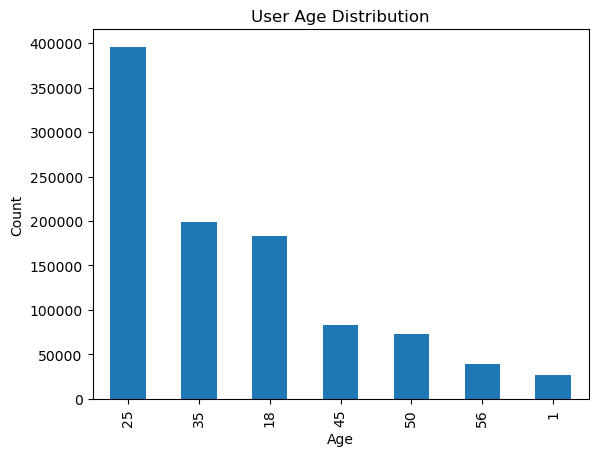

In [20]:
dfMaster['Age'].value_counts().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('User Age Distribution')
plt.show() 

<AxesSubplot:xlabel='Age', ylabel='count'>

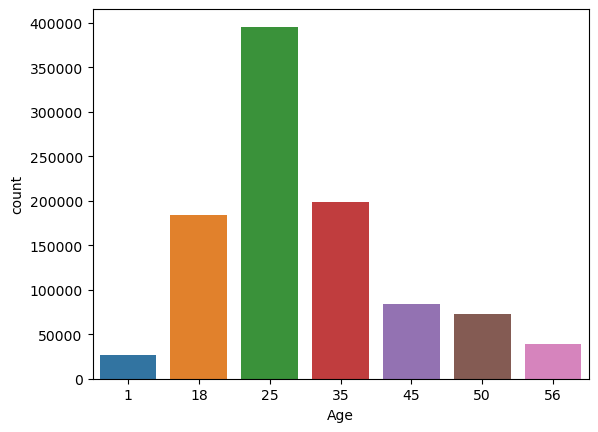

In [21]:
sns.countplot(x=dfMaster['Age'])

## 3) 2) User rating of the movie “Toy Story”

In [22]:
dfMaster.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [23]:
toystory=dfMaster[dfMaster['Title'].str.contains('Toy Story')==True]
toystory

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
50,3114,Toy Story 2 (1999),Animation|Children's|Comedy,1,4,978302174,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
...,...,...,...,...,...,...,...,...,...,...
998988,3114,Toy Story 2 (1999),Animation|Children's|Comedy,3023,4,970471948,F,25,7,92108
999027,3114,Toy Story 2 (1999),Animation|Children's|Comedy,5800,5,958015250,M,35,18,90804
999486,3114,Toy Story 2 (1999),Animation|Children's|Comedy,2189,4,974607816,M,1,10,60148
999869,3114,Toy Story 2 (1999),Animation|Children's|Comedy,159,4,989966944,F,45,0,37922


In [24]:
toystory.groupby(['Title','Rating']).size()

Title               Rating
Toy Story (1995)    1          16
                    2          61
                    3         345
                    4         835
                    5         820
Toy Story 2 (1999)  1          25
                    2          44
                    3         214
                    4         578
                    5         724
dtype: int64

<AxesSubplot:ylabel='Title,Rating'>

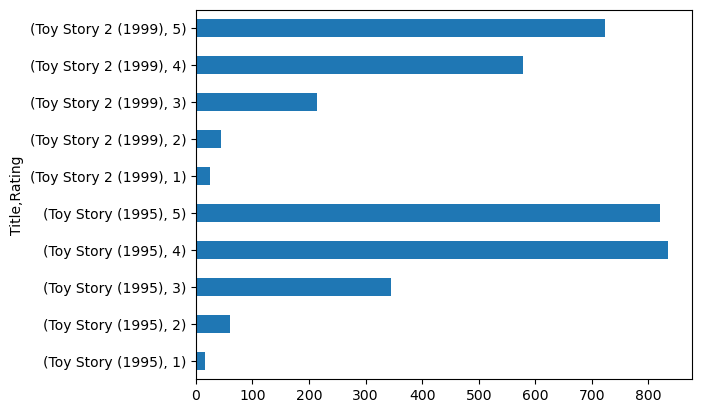

In [25]:
toystory.groupby(['Title','Rating']).size().plot(kind='barh')

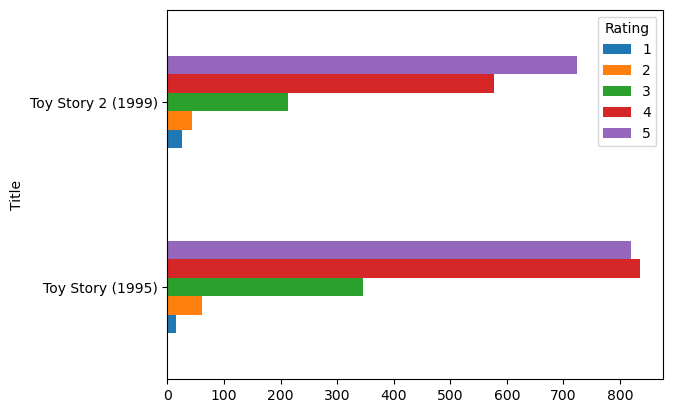

In [26]:
toystory.groupby(['Title','Rating']).size().unstack().plot(kind='barh',legend=True)
plt.show()

## 3) 3) Top 25 movies by viewership rating

In [27]:
dfMaster

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


In [28]:
dfTop25=dfMaster.groupby('Title').size().sort_values(ascending=False)[:25]

In [29]:
dfTop25

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

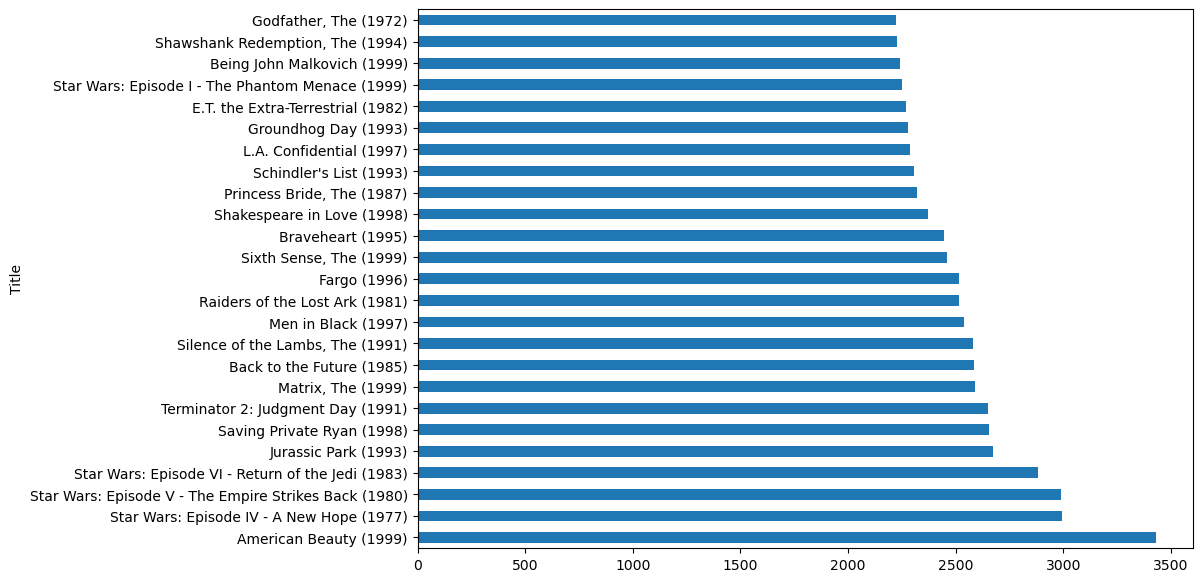

In [30]:
plt.figure(figsize=(10,7))
dfTop25.plot(kind='barh')
plt.show()

## 3) 4) Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [31]:
dfMaster[dfMaster['UserID']==2696]

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip Code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


In [32]:
dfMaster[dfMaster['UserID']==2696].shape

(20, 10)

# 4. Feature Engineering:

Use column genres:
1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
3. Determine the features affecting the ratings of any particular movie.
4. Develop an appropriate model to predict the movie ratings

In [33]:
dfMaster

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


## 4) 1) Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres

In [34]:
dfMaster['Genres']

0                   Animation|Children's|Comedy
1          Animation|Children's|Musical|Romance
2                                         Drama
3               Action|Adventure|Fantasy|Sci-Fi
4                                     Drama|War
                           ...                 
1000204                          Drama|Thriller
1000205                  Comedy|Horror|Thriller
1000206                          Comedy|Romance
1000207                         Action|Thriller
1000208                            Action|Drama
Name: Genres, Length: 1000209, dtype: object

In [35]:
dfGenres=dfMaster['Genres'].str.split('|')

In [36]:
dfGenres

0                    [Animation, Children's, Comedy]
1          [Animation, Children's, Musical, Romance]
2                                            [Drama]
3               [Action, Adventure, Fantasy, Sci-Fi]
4                                       [Drama, War]
                             ...                    
1000204                            [Drama, Thriller]
1000205                   [Comedy, Horror, Thriller]
1000206                            [Comedy, Romance]
1000207                           [Action, Thriller]
1000208                              [Action, Drama]
Name: Genres, Length: 1000209, dtype: object

In [37]:
listgeneres=set()
for genre in dfGenres:
    listgeneres=listgeneres.union(set(genre))

In [38]:
listgeneres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [39]:
len(listgeneres)

18

## 4) 2) Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre   

In [40]:
# Scikit Learn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [41]:
GeneresOneHot=dfMaster['Genres'].str.get_dummies('|')

In [42]:
GeneresOneHot

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1000205,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1000206,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1000207,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [43]:
dfMaster=pd.concat([dfMaster,GeneresOneHot],axis=1)

In [44]:
dfMaster

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip Code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843,...,0,0,0,0,0,0,0,1,0,0
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843,...,0,0,1,0,0,0,0,1,0,0
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843,...,0,0,0,0,0,1,0,0,0,0
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843,...,0,0,0,0,0,0,0,1,0,0


In [45]:
dfMaster.to_csv('dfMaster1')

## 4) 3) Determine the features affecting the ratings of any particular movie.

In [46]:
dfMaster.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip Code', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [47]:
dfMaster1 = dfMaster.copy()

### Gender vs Rating

In [48]:
dfMaster1['Gender']

0          F
1          F
2          F
3          F
4          F
          ..
1000204    M
1000205    M
1000206    M
1000207    M
1000208    M
Name: Gender, Length: 1000209, dtype: object

In [49]:
# Convert categorical data into numbers
dfMaster1['Gender'] = dfMaster1['Gender'].replace('M','0')
dfMaster1['Gender'] = dfMaster1['Gender'].replace('F','1')

In [50]:
dfMaster1.dtypes

MovieID         int64
Title          object
Genres         object
UserID          int64
Rating          int64
Timestamp       int64
Gender         object
Age             int64
Occupation      int64
Zip Code       object
Action          int64
Adventure       int64
Animation       int64
Children's      int64
Comedy          int64
Crime           int64
Documentary     int64
Drama           int64
Fantasy         int64
Film-Noir       int64
Horror          int64
Musical         int64
Mystery         int64
Romance         int64
Sci-Fi          int64
Thriller        int64
War             int64
Western         int64
dtype: object

In [51]:
dfMaster1['Gender'] = dfMaster1['Gender'].astype(int)

In [52]:
dfMaster1.dtypes

MovieID         int64
Title          object
Genres         object
UserID          int64
Rating          int64
Timestamp       int64
Gender          int32
Age             int64
Occupation      int64
Zip Code       object
Action          int64
Adventure       int64
Animation       int64
Children's      int64
Comedy          int64
Crime           int64
Documentary     int64
Drama           int64
Fantasy         int64
Film-Noir       int64
Horror          int64
Musical         int64
Mystery         int64
Romance         int64
Sci-Fi          int64
Thriller        int64
War             int64
Western         int64
dtype: object

In [53]:
dfMaster1['Gender'].value_counts()
#Males are given more rating

0    753769
1    246440
Name: Gender, dtype: int64

In [54]:
# Find relationship between gender & rating
GenderAffecting=dfMaster1.groupby(['Gender','Rating']).size()

In [55]:
GenderAffecting

Gender  Rating
0       1          42827
        2          83009
        3         198231
        4         261938
        5         167764
1       1          13347
        2          24548
        3          62966
        4          87033
        5          58546
dtype: int64

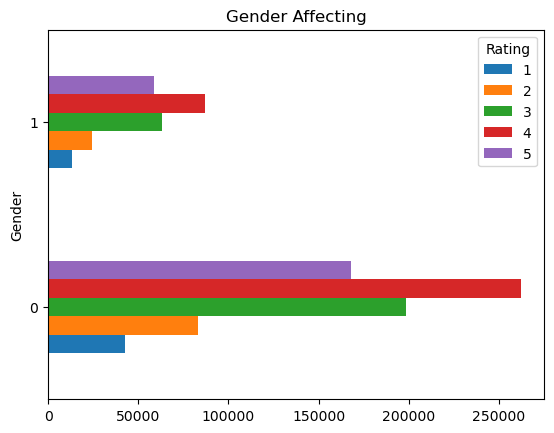

In [56]:
dfMaster1.groupby(['Gender','Rating']).size().unstack().plot(kind='barh',legend=True)
plt.title('Gender Affecting')
plt.show()

### Age vs Rating

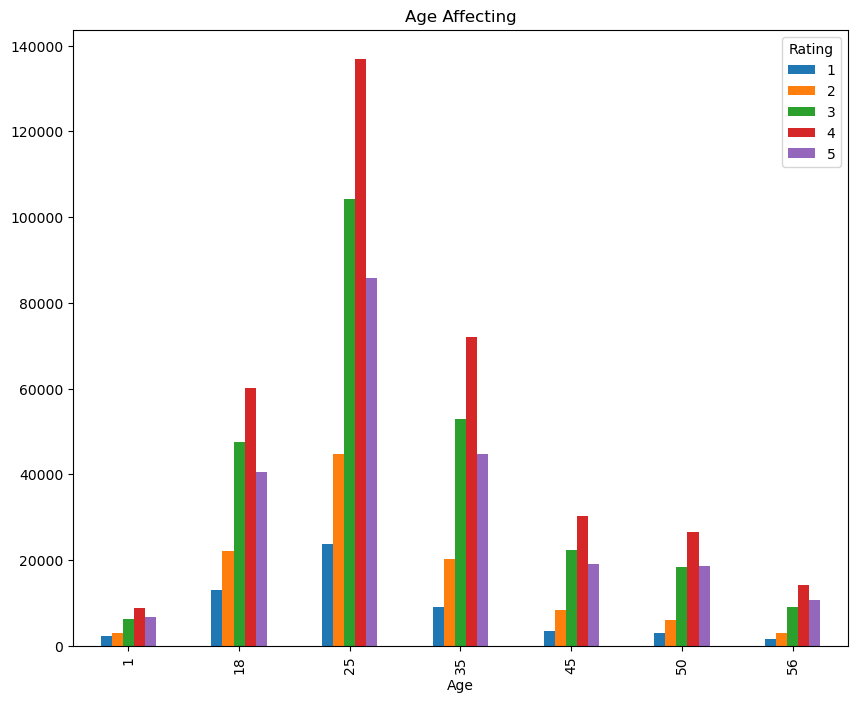

In [57]:
dfMaster1.groupby(['Age','Rating']).size().unstack().plot(kind='bar',legend=True,figsize=(10,8))
plt.title('Age Affecting')
plt.show()

### Occupation vs Rating

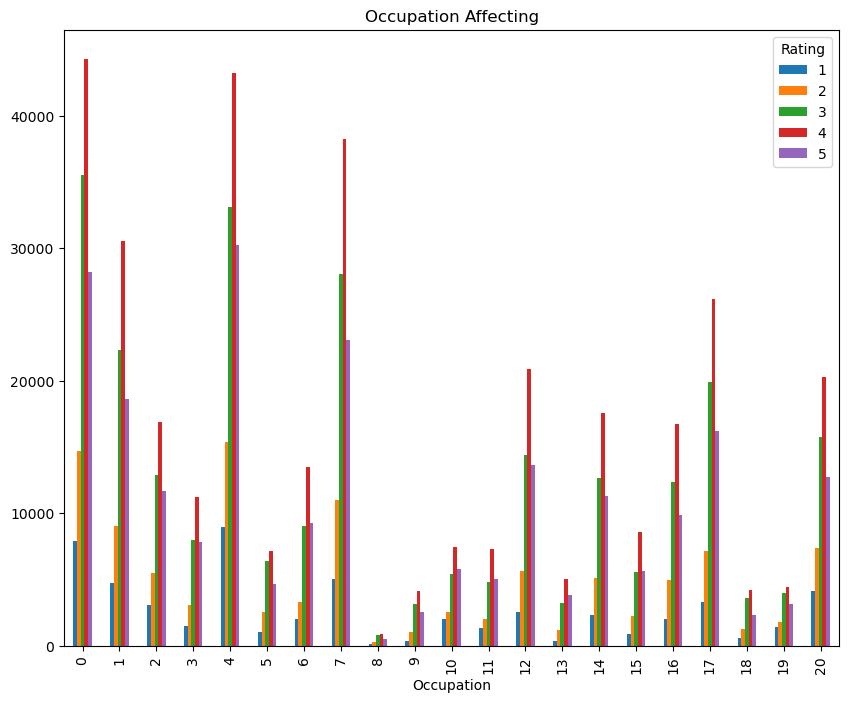

In [58]:
# Relationship Occupation vs Rating
dfMaster1.groupby(['Occupation','Rating']).size().unstack().plot(kind='bar',legend=True,figsize=(10,8))
plt.title('Occupation Affecting')
plt.show()

In [59]:
# Yes Gender,Age and Occupation are affecting the ratings of the movie

## 4) 4) Develop an appropriate model to predict the movie ratings

In [60]:
dfMaster1.shape

(1000209, 28)

In [61]:
# Fisrt 500 records
new_data=dfMaster1[:500]

In [62]:
# Input data
X=new_data[['MovieID','Age','Occupation','Gender']]

In [63]:
# Input data
X=new_data[['MovieID','Age','Occupation','Gender']].values

In [64]:
# Create output data
y=new_data[['Rating']].values

In [65]:
y

array([[5],
       [5],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [3],
       [3],
       [3],
       [4],
       [3],
       [4],
       [4],
       [5],
       [5],
       [5],
       [5],
       [4],
       [5],
       [3],
       [4],
       [4],
       [5],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [3],
       [3],
       [5],
       [4],
       [3],
       [4],
       [4],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [5],
       [5],
       [4],
       [2],
       [4],
       [4],
       [3],
       [4],
       [4],
       [4],
       [3],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [3],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [3],
       [3],
    

In [66]:
# Create train data & test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [67]:
#shape of train and test data
print(X_train.shape)

(400, 4)


In [68]:
#shape of train and test data
print(X_test.shape)

(100, 4)


In [69]:
#shape of train and test data
print(y_train.shape)

(400, 1)


In [70]:
#shape of train and test data
print(y_test.shape)

(100, 1)


In [71]:
# Apply Machine Learning Algorithm
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [72]:
lr.fit(X_train,y_train) # Apply Linear Regression on training data

LinearRegression()

In [73]:
y_predict=lr.predict(X_test)

In [74]:
y_predict

array([[3.46596348],
       [3.96471588],
       [4.31047093],
       [3.99788954],
       [3.68849118],
       [4.27254115],
       [4.30172875],
       [4.05316268],
       [4.02252707],
       [4.18751639],
       [4.2936504 ],
       [3.81923886],
       [4.26506799],
       [3.90352061],
       [4.31625205],
       [4.28057831],
       [4.14845859],
       [4.13671417],
       [3.75346841],
       [4.24955767],
       [4.15804678],
       [4.15720077],
       [3.90518754],
       [3.49627911],
       [3.96076779],
       [4.18032524],
       [4.14803558],
       [3.7680548 ],
       [3.75335251],
       [3.65335635],
       [4.17130106],
       [3.64912626],
       [4.19047745],
       [3.92527304],
       [4.35822974],
       [3.65561239],
       [4.24391756],
       [3.97811115],
       [3.78314211],
       [4.05270169],
       [4.28791046],
       [3.82230294],
       [4.16199486],
       [3.84659342],
       [4.10287347],
       [3.95963977],
       [4.37923917],
       [4.277

In [75]:
y_test

array([[4],
       [3],
       [4],
       [2],
       [5],
       [4],
       [4],
       [4],
       [5],
       [5],
       [4],
       [3],
       [3],
       [4],
       [4],
       [5],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [3],
       [4],
       [5],
       [5],
       [5],
       [3],
       [3],
       [4],
       [5],
       [5],
       [4],
       [5],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [4],
       [3],
       [4],
       [4],
       [5],
       [4],
       [5],
       [3],
       [3],
       [5],
       [4],
       [4],
       [4],
       [4],
       [5],
       [4],
       [3],
       [5],
       [4],
       [5],
       [5],
       [4],
       [5],
       [3],
       [4],
       [3],
       [3],
       [4],
       [5],
       [5],
       [4],
       [4],
       [3],
       [5],
       [4],
       [3],
       [3],
       [4],
       [4],
       [5],
       [4],
       [3],
       [5],
    

In [76]:
# Print the error
from sklearn.metrics import mean_squared_error
print('mean squared error',mean_squared_error(y_test,y_predict))

mean squared error 0.6489142338657046
